# Fifa 19 EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [4]:
df = pd.read_csv("fifa_eda.csv")

In [5]:
print(df.head())

       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# For demonstration purposes, let's fill missing values in numeric columns with their mean
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

Missing Values:
 ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64


In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

In [8]:
print(df.head())

       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    

## Which nationality is most prevalent among FIFA 19 players? 

Top 10 Most Prevalent Nationalities:
Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64


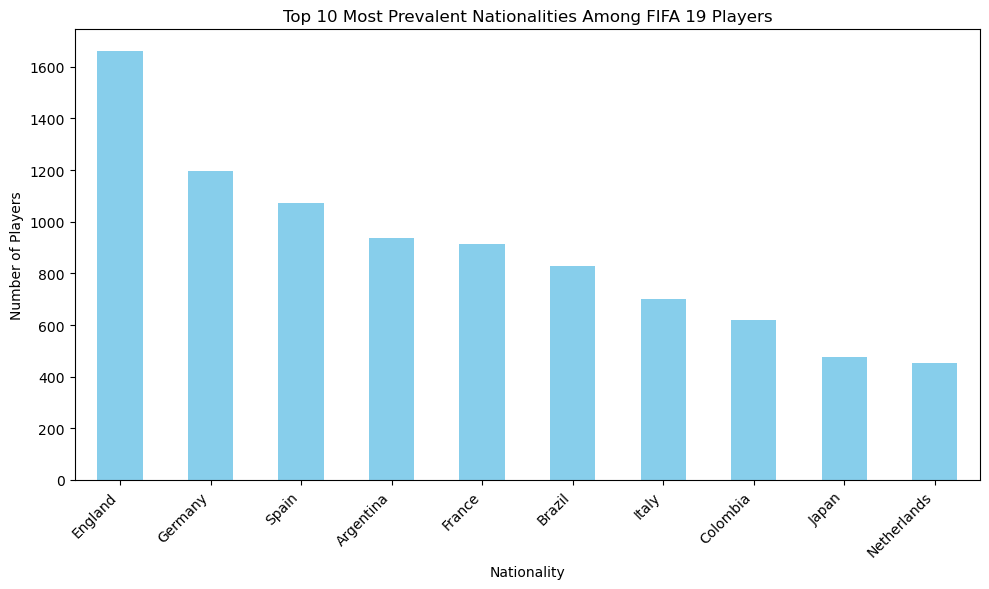

In [9]:
# Check the distribution of player nationalities
nationality_counts = df['Nationality'].value_counts()

# Display the top 10 most prevalent nationalities
top_nationalities = nationality_counts.head(10)
print("Top 10 Most Prevalent Nationalities:")
print(top_nationalities)

# Plot the distribution of player nationalities
plt.figure(figsize=(10, 6))
top_nationalities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prevalent Nationalities Among FIFA 19 Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## What is the distribution of preferred foot (left or right) among players?

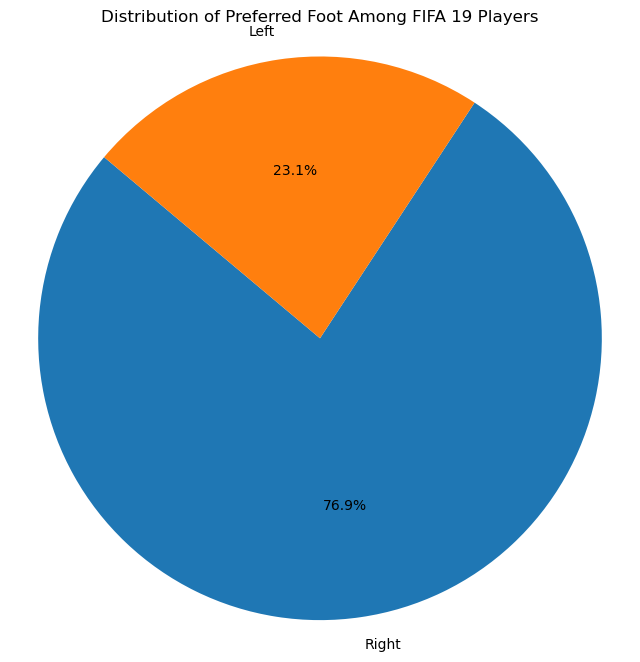

In [10]:
# Check the distribution of preferred foot
preferred_foot_counts = df['Preferred Foot'].value_counts()

# Plot the distribution of preferred foot in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(preferred_foot_counts, labels=preferred_foot_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Preferred Foot Among FIFA 19 Players')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Which position has the highest average overall rating?

<Figure size 1200x800 with 0 Axes>

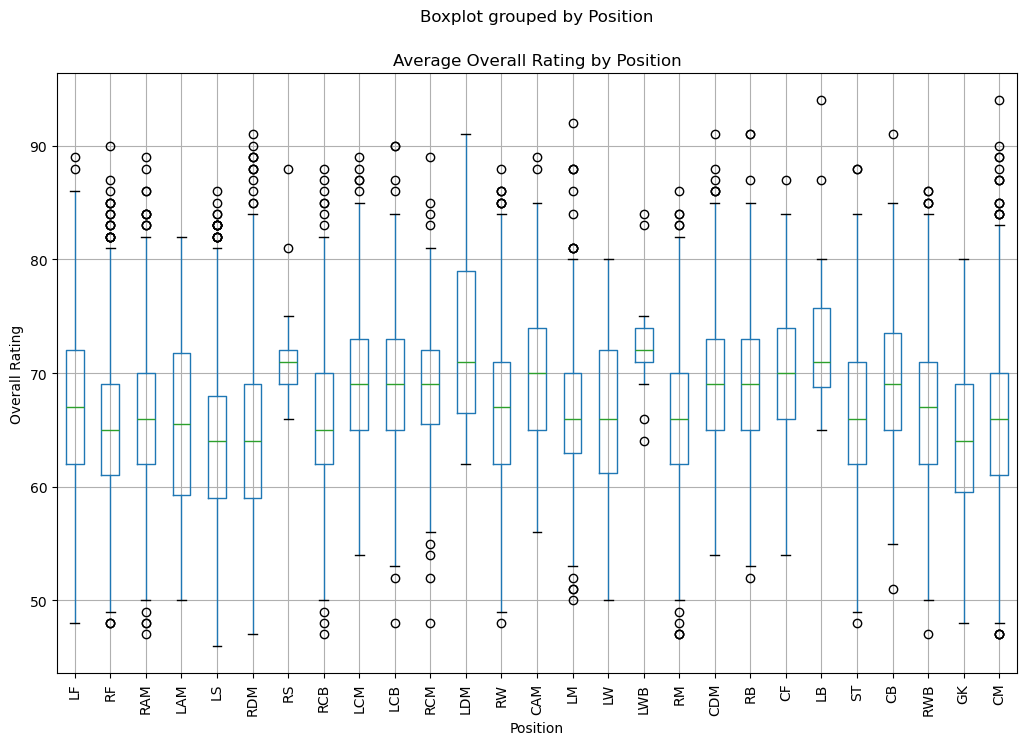

In [11]:
# Calculate the average overall rating for each position
position_avg_rating = df.groupby('Position')['Overall'].mean().sort_values(ascending=False)

# Create a box plot to visualize the average overall ratings across positions
plt.figure(figsize=(12, 8))
df.boxplot(column='Overall', by='Position', figsize=(12, 8), rot=90)
plt.title('Average Overall Rating by Position')
plt.xlabel('Position')
plt.ylabel('Overall Rating')
plt.xticks(range(1, len(position_avg_rating) + 1), position_avg_rating.index)
plt.show()

## Is there a correlation between a player's age and their potential rating?

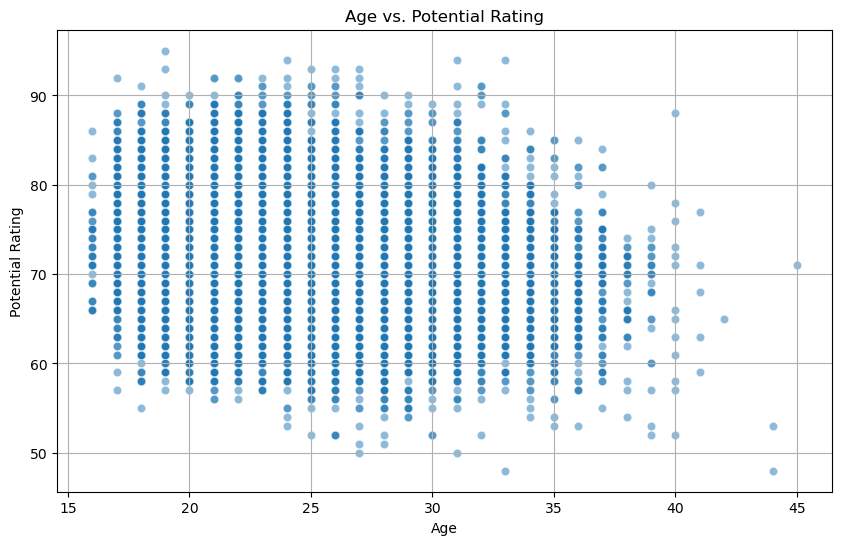

Correlation Coefficient between Age and Potential Rating: -0.2533121074109556


In [12]:
# Drop rows with missing values in 'Age' or 'Potential' columns
df = df.dropna(subset=['Age', 'Potential'])

# Data Exploration
# Scatter plot of Age vs. Potential Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Potential', data=df, alpha=0.5)
plt.title('Age vs. Potential Rating')
plt.xlabel('Age')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_coefficient = df['Age'].corr(df['Potential'])
print("Correlation Coefficient between Age and Potential Rating:", correlation_coefficient)

## Which club has the highest average player rating?

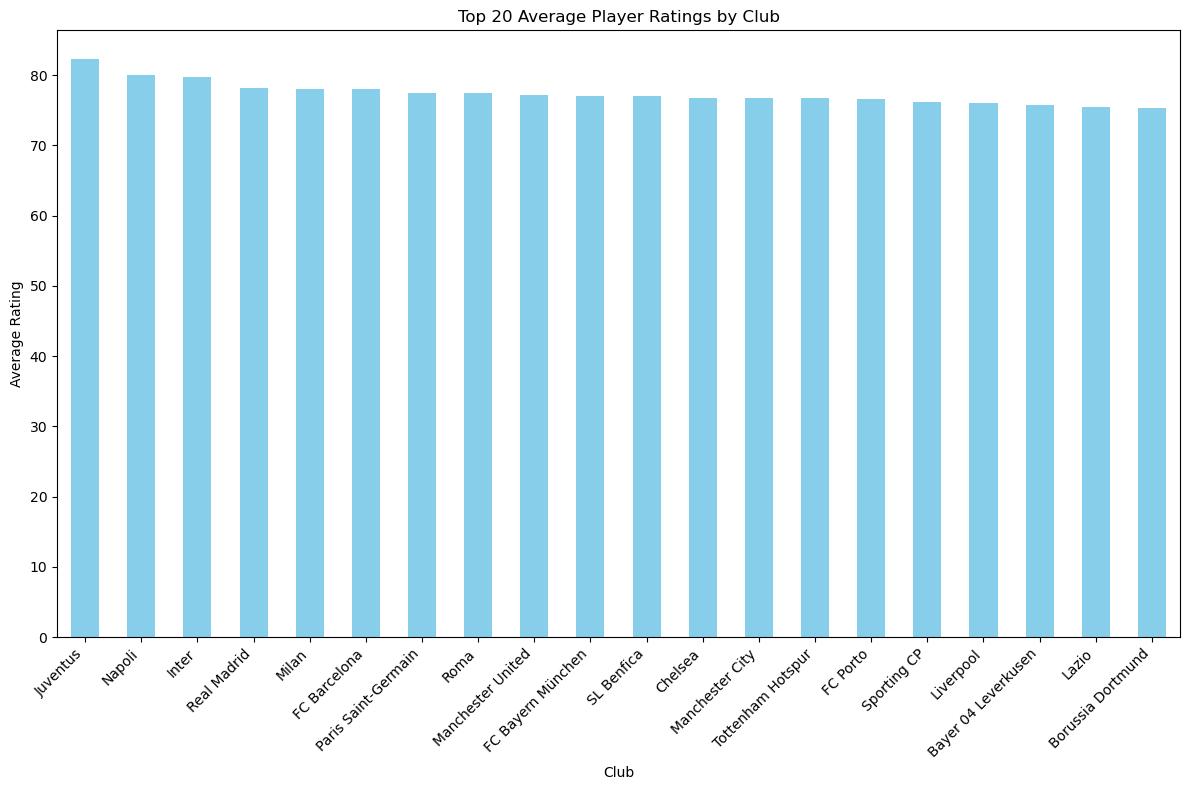

Top 20 Average Player Ratings by Club:
Club
Juventus               82.280000
Napoli                 80.000000
Inter                  79.750000
Real Madrid            78.242424
Milan                  78.074074
FC Barcelona           78.030303
Paris Saint-Germain    77.433333
Roma                   77.423077
Manchester United      77.242424
FC Bayern München      77.000000
SL Benfica             77.000000
Chelsea                76.787879
Manchester City        76.727273
Tottenham Hotspur      76.696970
FC Porto               76.678571
Sporting CP            76.133333
Liverpool              76.000000
Bayer 04 Leverkusen    75.807692
Lazio                  75.437500
Borussia Dortmund      75.333333
Name: Overall, dtype: float64


In [13]:
# Data Preparation
# Drop rows with missing values in 'Overall' or 'Club' columns
df = df.dropna(subset=['Overall', 'Club'])

# Data Exploration
# Calculate the average overall rating for each club
club_avg_rating = df.groupby('Club')['Overall'].mean().sort_values(ascending=False)

# Visualization
# Plot the average ratings for the top 20 clubs
plt.figure(figsize=(12, 8))
top_20_clubs = club_avg_rating.head(20)
top_20_clubs.plot(kind='bar', color='skyblue')
plt.title('Top 20 Average Player Ratings by Club')
plt.xlabel('Club')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the top 5 clubs with the highest average rating
print("Top 20 Average Player Ratings by Club:")
print(top_20_clubs)


## How does a player's skill moves rating relate to their overall rating?

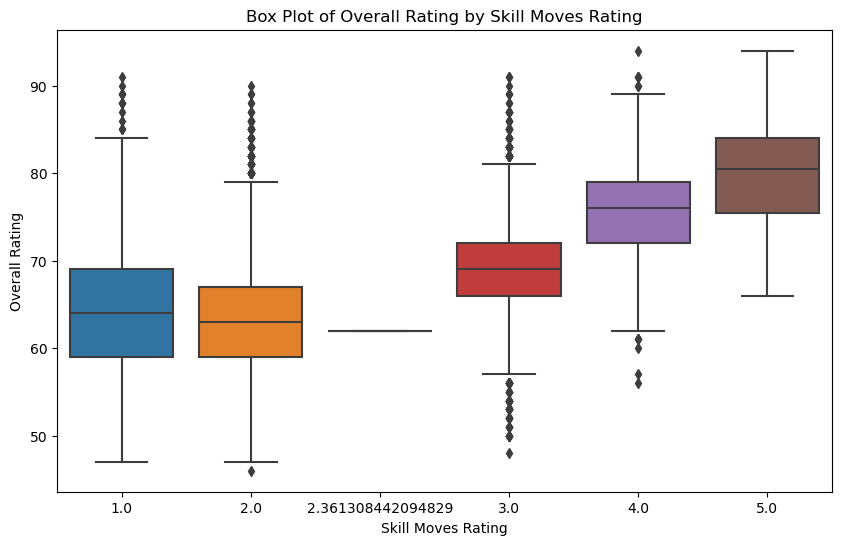

Correlation Coefficient between Skill Moves and Overall Rating: 0.41566042584947877


In [14]:
# Data Preparation
# Drop rows with missing values in 'Skill Moves' or 'Overall' columns
df = df.dropna(subset=['Skill Moves', 'Overall'])

# Data Exploration
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Skill Moves', y='Overall', data=df)
plt.title('Box Plot of Overall Rating by Skill Moves Rating')
plt.xlabel('Skill Moves Rating')
plt.ylabel('Overall Rating')
plt.show()
# Correlation Analysis
correlation_coefficient = df['Skill Moves'].corr(df['Overall'])
print("Correlation Coefficient between Skill Moves and Overall Rating:", correlation_coefficient)

## Do players with certain physical attributes excel in specific positions on the field?

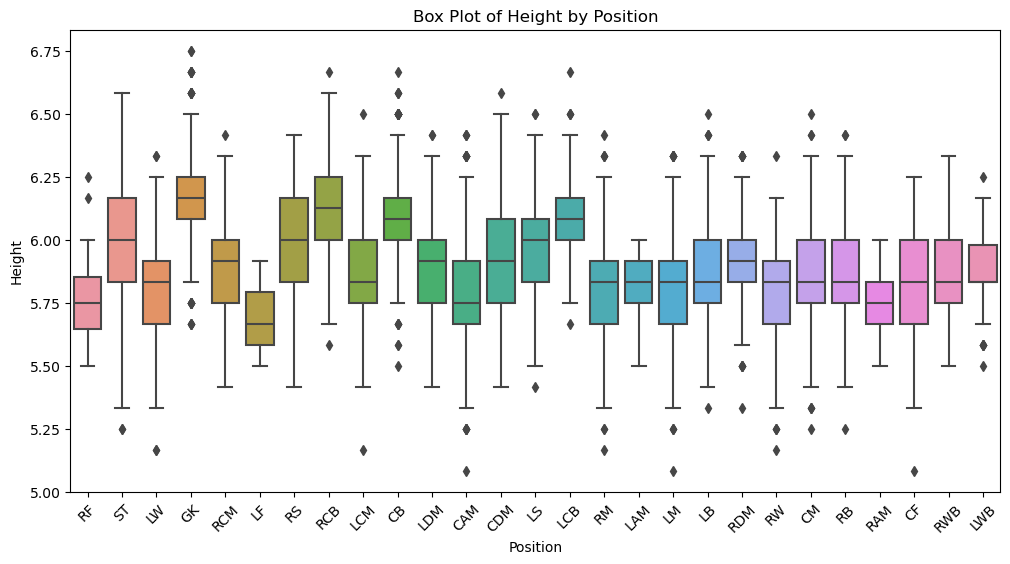

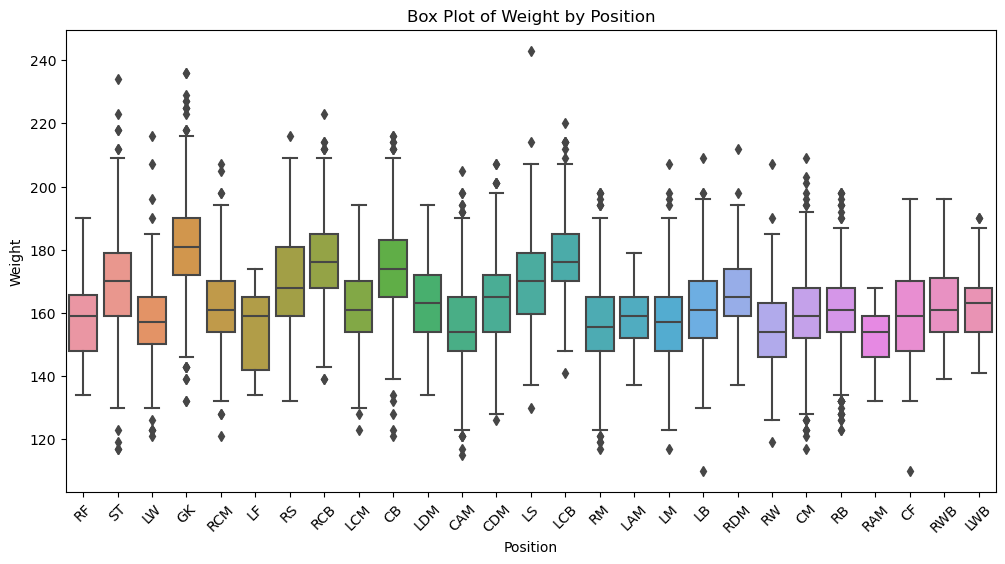

In [15]:
# Data Preparation
# Drop rows with missing values in 'Position', 'Height', or 'Weight' columns
df = df.dropna(subset=['Position', 'Height', 'Weight'])

# Data Exploration
# Visualize the distribution of physical attributes for players in different positions

# Box Plot of Height by Position
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Height', data=df)
plt.title('Box Plot of Height by Position')
plt.xlabel('Position')
plt.ylabel('Height')
plt.xticks(rotation=45)
plt.show()

# Box Plot of Weight by Position
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Weight', data=df)
plt.title('Box Plot of Weight by Position')
plt.xlabel('Position')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

## Are there any trends in market values based on a player's age or international reputation? 

C:\Users\Ahmed Eltras\AppData\Local\Temp\ipykernel_10012\1935994267.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby(age_groups)['Value'].describe()


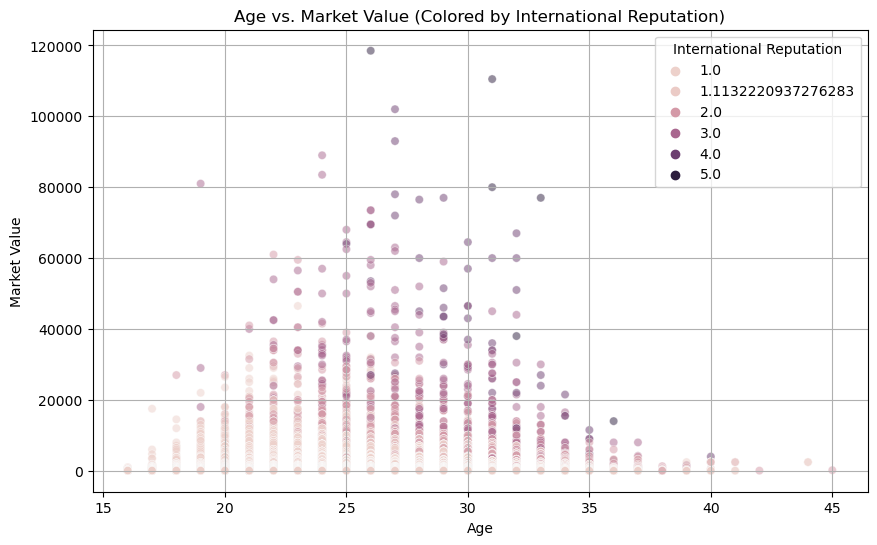

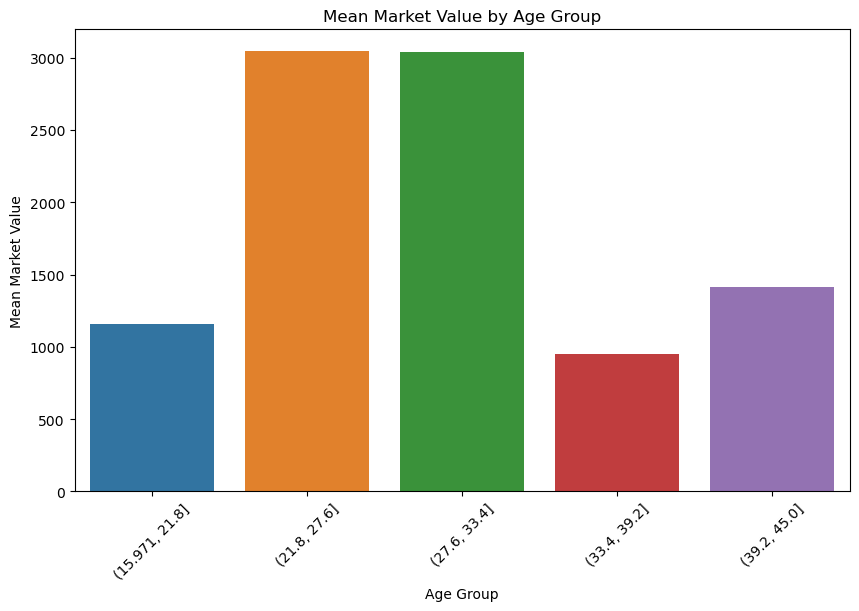

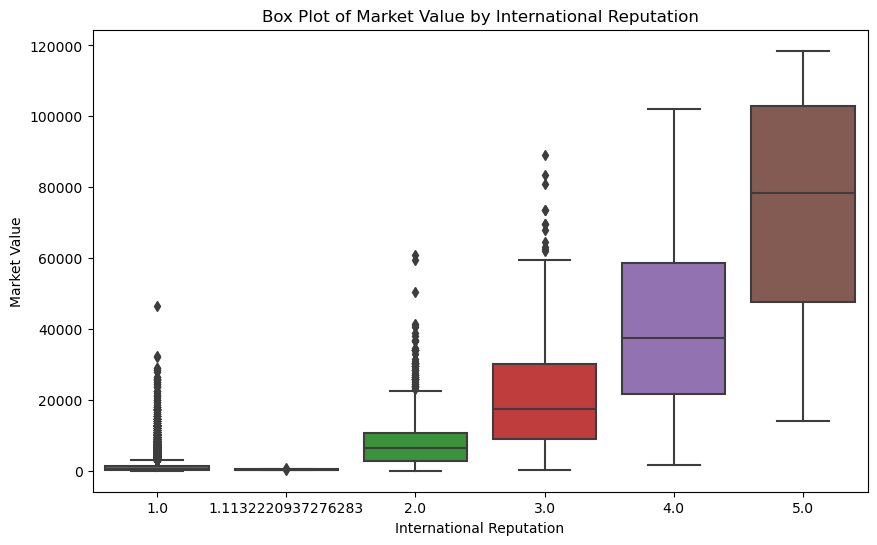

In [16]:
# Data Preparation
# Drop rows with missing values in 'Age', 'Market Value', or 'International Reputation' columns
df = df.dropna(subset=['Age', 'Value', 'International Reputation'])

# Data Exploration
age_groups = pd.cut(df['Age'], bins=5)
age_group_stats = df.groupby(age_groups)['Value'].describe()
# Visualize the distribution of market values based on a player's age and international reputation

# Scatter Plot of Age vs. Market Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Value', data=df, hue='International Reputation', alpha=0.5)
plt.title('Age vs. Market Value (Colored by International Reputation)')
plt.xlabel('Age')
plt.ylabel('Market Value')
plt.grid(True)
plt.legend(title='International Reputation')
plt.show()

# Bar Plot of Mean Market Value by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_stats.index.astype(str), y='mean', data=age_group_stats)
plt.title('Mean Market Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Market Value')
plt.xticks(rotation=45)
plt.show()

# Box Plot of Market Value by International Reputation
plt.figure(figsize=(10, 6))
sns.boxplot(x='International Reputation', y='Value', data=df)
plt.title('Box Plot of Market Value by International Reputation')
plt.xlabel('International Reputation')
plt.ylabel('Market Value')
plt.show()

## Correlation Between Features

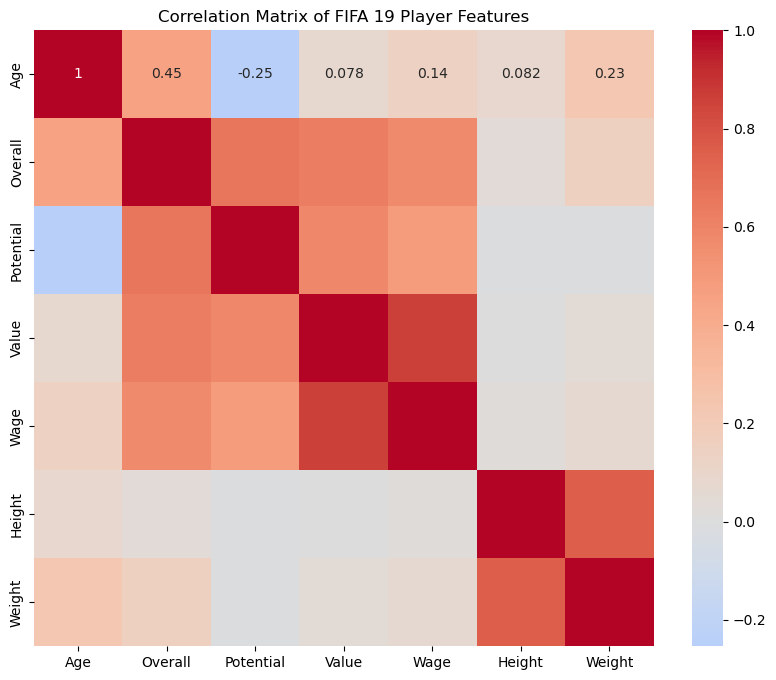

In [17]:
# Data Preparation
# Select features of interest
features_of_interest = ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Height', 'Weight']
df_selected = df[features_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of FIFA 19 Player Features')
plt.show()

## Analyze Correlation Between Features
The most common correlation coefficient is the Pearson correlation, which ranges from -1 to 1:
''
1 indicates a perfect positive linear relationship'.'
-1 indicates a perfect negative linear relationshi'p'.
0 indicates no linear relions
##Interpretation of the Correlation Matrix
After running the code, you'll see a heatmap of the correlation matrix. Here's how to interpret the key correlations:

Age and Overall:

Typically, older players might have higher overall ratings due to experience, but this relationship c
n vary.
Age and Ptential:

Younger players often have higher potential ratings because they have more time 
to improve.
Overal and Value:

A higher overall rating generally correlates with a higher market value, as better players are worth more.
Overall and Wage:

Similarly, players with higher overall ratings tend to have higher wages.
Height and Weight:

There is usually a strong positive correlation between height and weight, as taller players tend to weigh more.
Value and Wage:

Players with higher market values often c
ommand higher wages.
Example Output and Interpretation
Assuming you ran the code, you might see the following key correlations (these re hypothetical values):

Overall vs Value: 0.75 (s-------
rong positive correlation)
Overall vs Wage: 0.70 (-------
trong positive correlation)
Age vs Potential: -0.60 (m-----
derate negative correlation)
Height vs Weight: 0.80 (strong positive correlation)hip.

## Linear Regression Model

Mean Squared Error: 5747002.8315943405
R^2 Score: 0.830070501124178


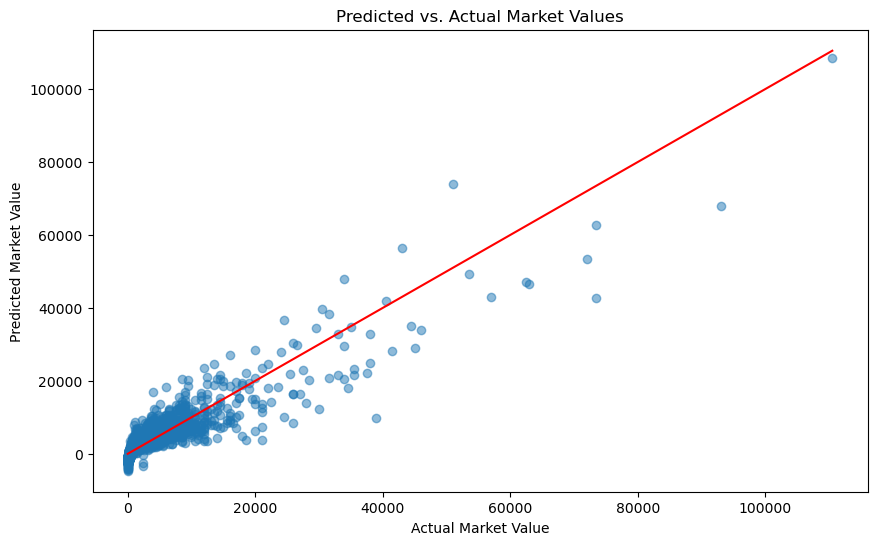

C:\Users\Ahmed Eltras\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


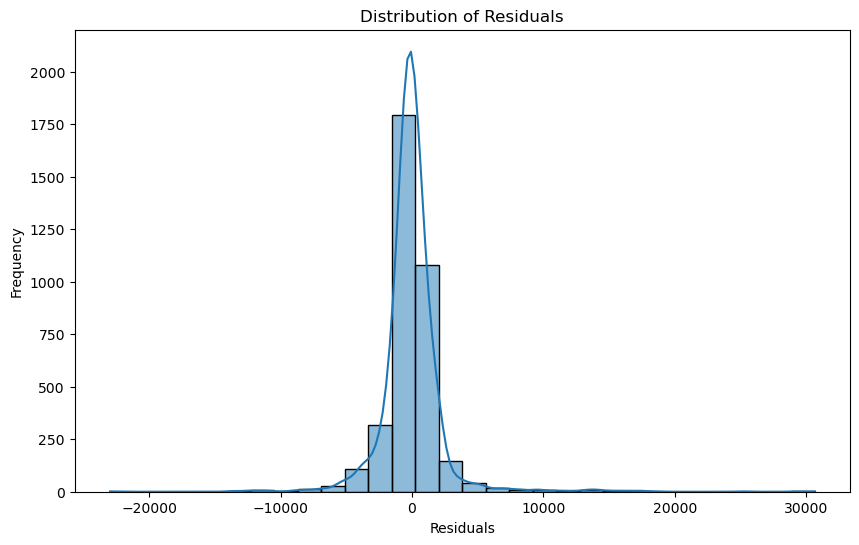

In [18]:
# Handle missing values: Drop rows with missing 'Value' or any predictor features
df = df.dropna(subset=['Value', 'Overall', 'Potential', 'Age', 'Wage', 'Height', 'Weight'])

# Convert 'Value' and 'Wage' from string to numeric
df['Value'] = df['Value'].replace('[\€,]', '', regex=True).astype(float)
df['Wage'] = df['Wage'].replace('[\€,]', '', regex=True).astype(float)

# Select features and target variable
features = ['Overall', 'Potential', 'Age', 'Wage', 'Height', 'Weight']
target = 'Value'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.title('Predicted vs. Actual Market Values')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Distribution of Residuals

توزيع طبيعي: إذا كانت البواقي موزعة بشكل طبيعي حول الصفر، فإن هذا يشير إلى أن النموذج مناسب.

عدم وجود نمط: البواقي يجب أن تكون موزعة بشكل عشوائي، دون نمط معين، مما يشير إلى أن النموذج يلتقط العلاقة الحقيقية بين المتغيرات.

قيم متطرفة: يمكن تحليل البواقي لتحديد وجود أي قيم متطرفة قد تؤثر على دقة النموذج

## KNN Model (K-Nearest Neighbors)

Mean Squared Error: 2048065.5412183679
R^2 Score: 0.9394420428730629
Best number of neighbors: 10
Optimized Mean Squared Error: 2237389.4369890364
Optimized R^2 Score: 0.9338440441115757


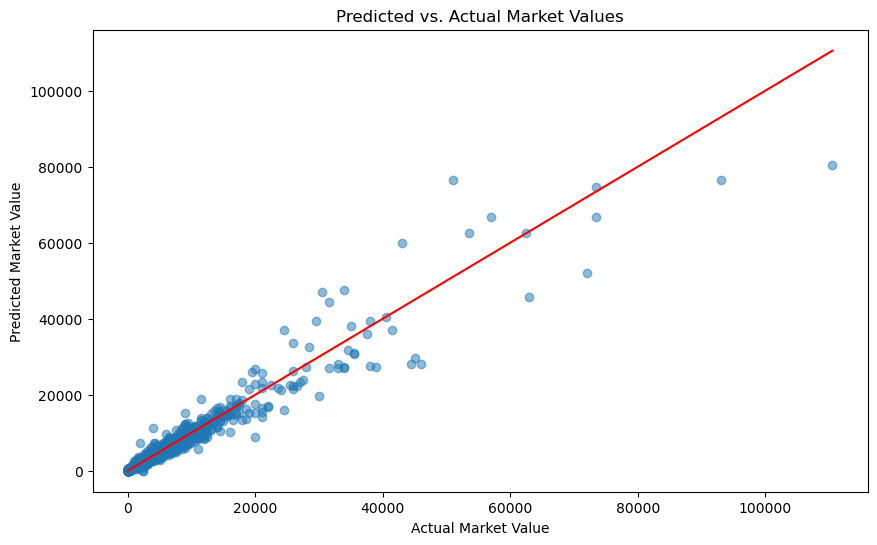

C:\Users\Ahmed Eltras\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


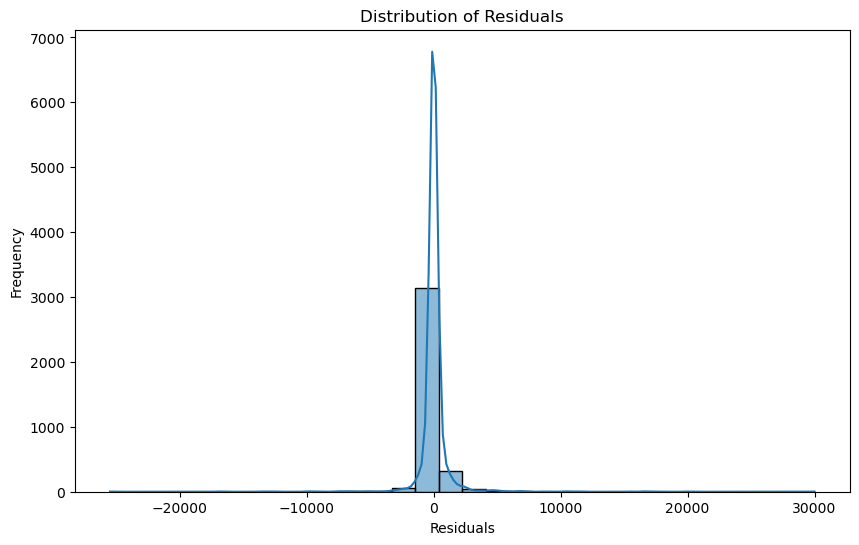

In [19]:
# Data Cleaning: Drop rows with missing values in the selected columns
df = df.dropna(subset=['Value', 'Overall', 'Potential', 'Age', 'Wage', 'Height', 'Weight'])

# Convert 'Value' and 'Wage' from string to numeric
df['Value'] = df['Value'].replace('[\€,]', '', regex=True).astype(float)
df['Wage'] = df['Wage'].replace('[\€,]', '', regex=True).astype(float)

# Select features and target variable
features = ['Overall', 'Potential', 'Age', 'Wage', 'Height', 'Weight']
target = 'Value'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the KNN model with k = 5
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 30)}
knn_gscv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

# Best number of neighbors
print(f"Best number of neighbors: {knn_gscv.best_params_['n_neighbors']}")

# Predict using the optimized model
y_pred_optimized = knn_gscv.predict(X_test)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R^2 Score: {r2_optimized}")

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.title('Predicted vs. Actual Market Values')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


## Decision Tree model

Mean Squared Error: 2665535.4984286875
R^2 Score: 0.9211844634922439
Best parameters: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3}
Optimized Mean Squared Error: 2810776.115440653
Optimized R^2 Score: 0.9168899353723733


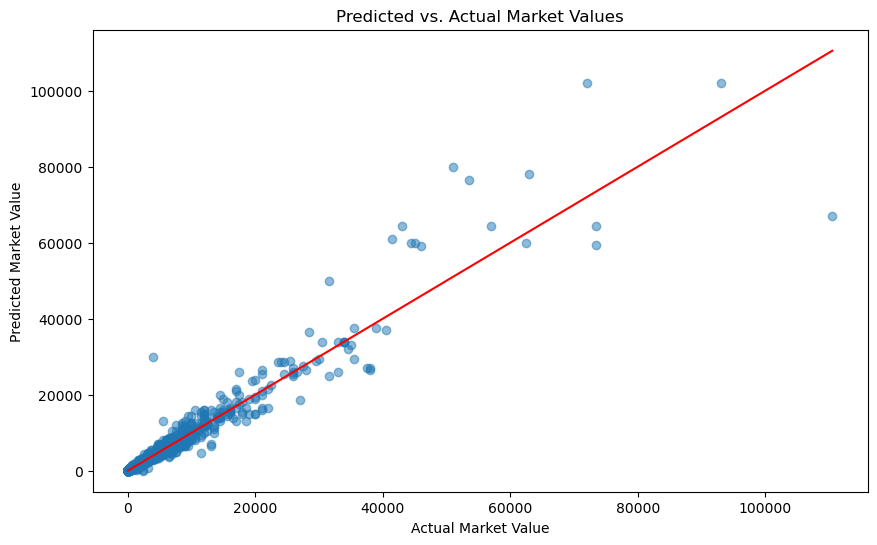

C:\Users\Ahmed Eltras\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


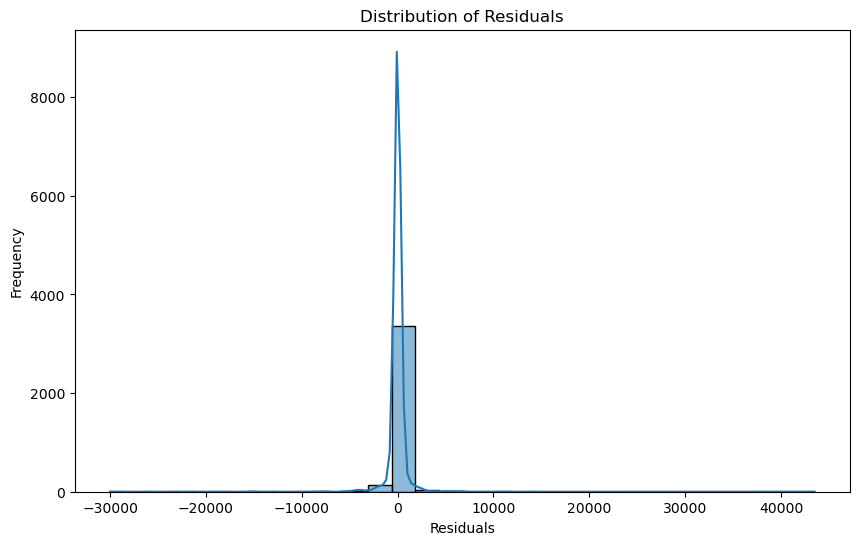

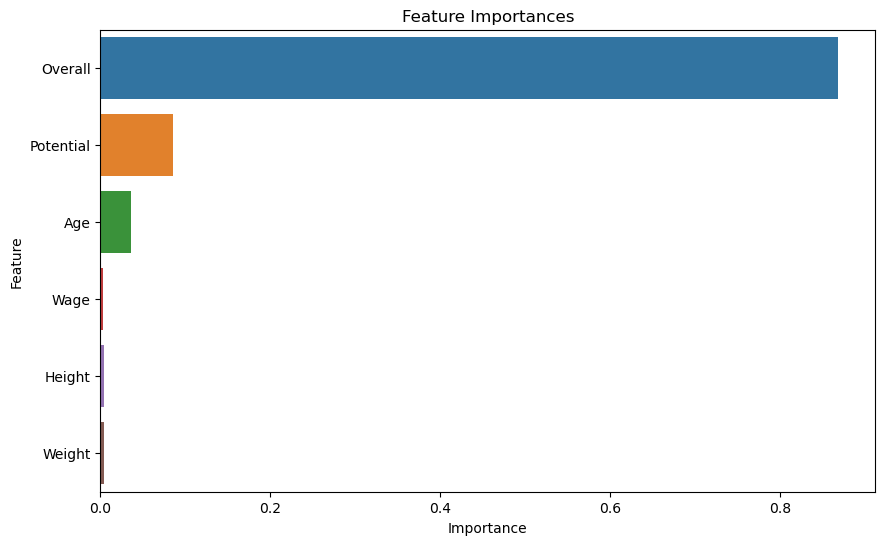

In [20]:
# Data Cleaning: Drop rows with missing values in the selected columns
df = df.dropna(subset=['Value', 'Overall', 'Potential', 'Age', 'Wage', 'Height', 'Weight'])

# Convert 'Value' and 'Wage' from string to numeric
df['Value'] = df['Value'].replace('[\€,]', '', regex=True).astype(float)
df['Wage'] = df['Wage'].replace('[\€,]', '', regex=True).astype(float)

# Select features and target variable
features = ['Overall', 'Potential', 'Age', 'Wage', 'Height', 'Weight']
target = 'Value'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}
dt_gscv = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
dt_gscv.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {dt_gscv.best_params_}")

# Predict using the optimized model
y_pred_optimized = dt_gscv.predict(X_test)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Squared Error: {mse_optimized}")
print(f"Optimized R^2 Score: {r2_optimized}")

# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.title('Predicted vs. Actual Market Values')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances = dt_gscv.best_estimator_.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Thanks.